# TT Kmeans ver 2 - Car ML

Author: Ty

Date: 6/15/19

I applied the Kmeans ver 2 lesson and tied it with my Car ML. I wanted to see how it would cluster the vehicle type results.

In [1]:
#First import pandas so that we can see the data in a dataframe view.
import pandas as pd

In [2]:
#Import the data file
mydata = pd.read_csv('Car_Data_WIP.csv')

In [3]:
mydata.head()

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Type,City,State
0,1,Ben,9,6,6,8,SUV,Burbank,CA
1,2,Patrick,9,7,6,5,Sedan,Burbank,CA
2,3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA
3,4,Jared,5,1,6,1,Sedan,Santa Monica,CA
4,5,Andrew,7,8,9,2,Sedan,Burbank,CA


In [4]:
#Assign the X values
X = mydata[['MPG', 'Power', 'Storage_Capacity', 'Towing']]

In [5]:
#Preview our data
#Now we have our X data ready to Fit into the model
X.head()

,MPG,Power,Storage_Capacity,Towing
0,9,6,6,8
1,9,7,6,5
2,10,5,7,1
3,5,1,6,1
4,7,8,9,2


In [6]:
#Assign the y values
#Alt way is: y = mydata['Type'] #This does a dataframe
y = mydata.Type

In [7]:
#Preview our data
#Now we have our y data ready to Fit into the model
y.head()

0      SUV
1    Sedan
2    Sedan
3    Sedan
4    Sedan
Name: Type, dtype: object

In [8]:
from sklearn.cluster import KMeans
#Import KMeans Clustering

In [9]:
kmeans = KMeans(n_clusters=3)
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
KModel = kmeans.fit(X)
KModel

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
KModel.labels_
#Here is the KMeans cluster predictions.

array([0, 0, 2, 2, 1, 0, 1, 0, 1, 1, 2, 1, 2, 2, 1, 0, 1, 1, 2])

In [12]:
KModel.cluster_centers_
#These are the 3 centers of the clusters.

array([[8.2       , 7.        , 7.6       , 6.2       ],
       [8.        , 7.25      , 6.5       , 1.75      ],
       [8.66666667, 3.83333333, 5.33333333, 1.33333333]])

In [13]:
import pandas as pd

pd.crosstab(y,KModel.labels_)
#Let's see sour results. Row "0" was perfect, but "2" was off. Harder to seperate that one.

col_0,0,1,2
Type,,,
SUV,3,3,0
Sedan,1,4,6
Truck,1,1,0


In [14]:
Kmean_Cluster_Result = KModel.labels_

In [15]:
#Now let's add our predicted results to our untested data
mydata['Kmean_Cluster_Result'] = Kmean_Cluster_Result

In [16]:
mydata

,Record_ID,Name,MPG,Power,Storage_Capacity,Towing,Type,City,State,Kmean_Cluster_Result
0,1,Ben,9,6,6,8,SUV,Burbank,CA,0
1,2,Patrick,9,7,6,5,Sedan,Burbank,CA,0
2,3,Matt,10,5,7,1,Sedan,Sherman Oaks,CA,2
3,4,Jared,5,1,6,1,Sedan,Santa Monica,CA,2
4,5,Andrew,7,8,9,2,Sedan,Burbank,CA,1
5,6,Aaron,9,6,10,8,Truck,North Hollywood,CA,0
6,7,Tom,7,7,7,3,Sedan,Torrance,CA,1
7,8,Philip,6,8,8,5,SUV,Burbank,CA,0
8,9,Eli,7,5,8,3,Truck,Whittier,CA,1
9,10,Kirk,8,7,7,1,SUV,Santa Clarita,CA,1


In [17]:
#Use Pandas to make a chart

df2_setup = mydata['Kmean_Cluster_Result'].value_counts()

In [18]:
df2_setup

1    8
2    6
0    5
Name: Kmean_Cluster_Result, dtype: int64

In [19]:
df2_viz = df2_setup.rename_axis('Cluster_ID').reset_index(name='Cluster_Count')

In [20]:
df2_viz

,Cluster_ID,Cluster_Count
0,1,8
1,2,6
2,0,5


In [21]:
grouped = df2_viz.groupby(['Cluster_ID'])['Cluster_Count']

In [22]:
import matplotlib.pyplot as plt

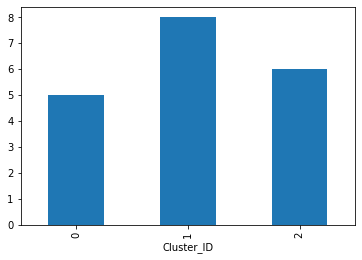

In [23]:
grouped.sum().plot(kind='bar')